In [61]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("library.R", local = T)

In [62]:
sheets <- c("20min STM", "1hr STM", "2hr STM", "3hr STM")
stm_experiments <-  c("20min STM", "1hr STM", "2hr STM", "3hr STM", "20min dunc")
data_clean_long <- data.table::fread(file = "tidy_data.csv")


In [63]:
table(data_clean_long$Training_session)


       1X 6X_Massed 6X_Spaced      NONE 
      608        52       536        62 

In [64]:
data_clean_long$test <- factor(data_clean_long$test, levels=c("PRE", "POST"))
data_clean_long$interval <- factor(data_clean_long$interval, levels=c("ZT05-ZT11", "ZT12-ZT18", "ZT05-ZT24", "NONE"))
data_clean_long$experiment <- factor(data_clean_long$experiment, levels=c(sheets, "LTM", "LTM CHX", "20min dunc"))

In [65]:
panel4_data <- data_clean_long[experiment == "LTM" & interval=="NONE" & Genotype == "Iso31"]# & User != "CH",]
labels<-c("6X_Massed"="6X Massed", "6X_Spaced"="6X Spaced", "NONE"="NONE")
panel4_data$Training_session <- factor(unname(labels[as.character(panel4_data$Training_session)]),  levels=unname(labels))

In [66]:
table(panel4_data$Training_session)


6X Massed 6X Spaced      NONE 
       52       112        62 

In [67]:
panel4_data[Training_session=="6X Massed",table(substr(fly_name_reference, 1, 10))]


2023-07-23 2023-07-24 2023-09-14 
        26         22          4 

In [68]:
panel4_data[Training_session=="NONE",table(substr(fly_name_reference, 1, 10))]


2023-07-12 2023-07-13 2023-07-18 2023-07-31 
        18         14         18         12 

[1] -1.02  0.70


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”


png 
  2

$gg

$n_facets
[1] 2

$direction
[1] "horizontal"


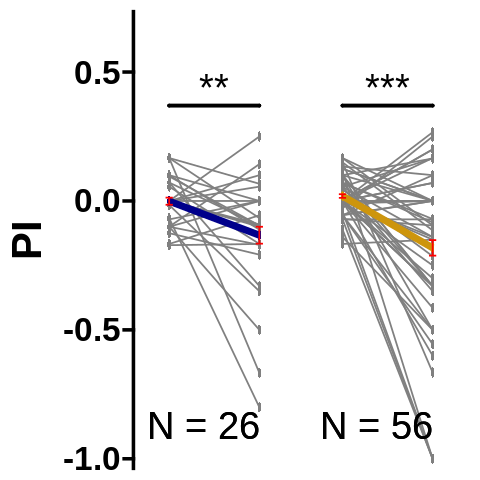

In [69]:
size_unit=2
ratio=2
panel4A <- learning_plot(
    panel4_data[Training_session!="NONE",], "Training_session", y_limits=c(-1, .7),
    hjust_text = 0.2, textsize = 8, starsize=8,
    y_annotation = 0.37,
    colors=colors_panel4[1:2]
)
save_learning_plot(plot=panel4A, filename = "figures/panel4A.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.width=size_unit*panel4A$n_facets, repr.plot.height=size_unit*ratio)
panel4A

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_signif()`).”


$gg

$n_facets
[1] 3


Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_signif()`).”


png 
  2

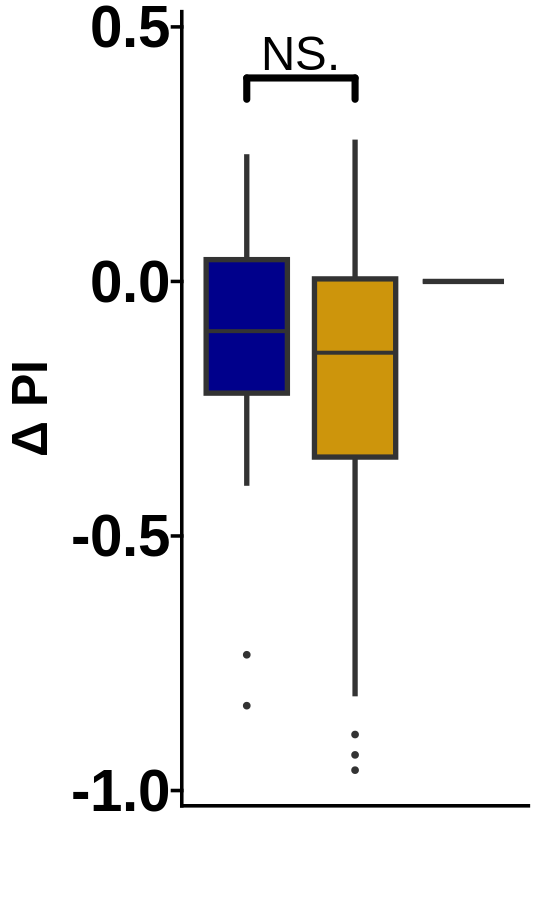

In [70]:
size_unit=1.5
ratio=5

panel4B <- summary_plot(
    panel4_data,
    "Training_session",
    comparisons=list(c("6X Massed", "6X Spaced")),
    annotation_y=.33,
    test=unpaired_t_test,
    map_signif_level=TRUE,
    y_limits=c(-1, 0.5),
    text_y_size=35,
    title_y_size=30,
    starsize=10,
    colors=colors_panel4
)
panel4B$gg <- panel4B$gg + theme(
    axis.ticks.x = element_blank(), axis.text.x = element_blank(),
)
#scale_y_continuous(breaks = seq(-1, 0.5, 0.5), limits=c(-1, 0.5))
options(repr.plot.width=size_unit*panel4B$n_facets, repr.plot.height=size_unit*ratio)
panel4B
save_summ_plot(plot=panel4B, filename = "figures/panel4B.svg", size_unit=size_unit, ratio=ratio)

In [71]:
table(panel4_data$Training_session)


6X Massed 6X Spaced      NONE 
       52       112        62 

Warning message in melt.data.table(data = data[test == "POST", ], id.vars = c("fly_name_reference", :
“'measure.vars' [ZT4, ZT4.5, ZT5, ZT5.5, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”
Warning message in melt.data.table(data = data[test == "POST", ], id.vars = c("fly_name_reference", :
“'measure.vars' [ZT4_interactions, ZT4.5_interactions, ZT5_interactions, ZT5.5_interactions, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message:

png 
  2

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_line()`).”


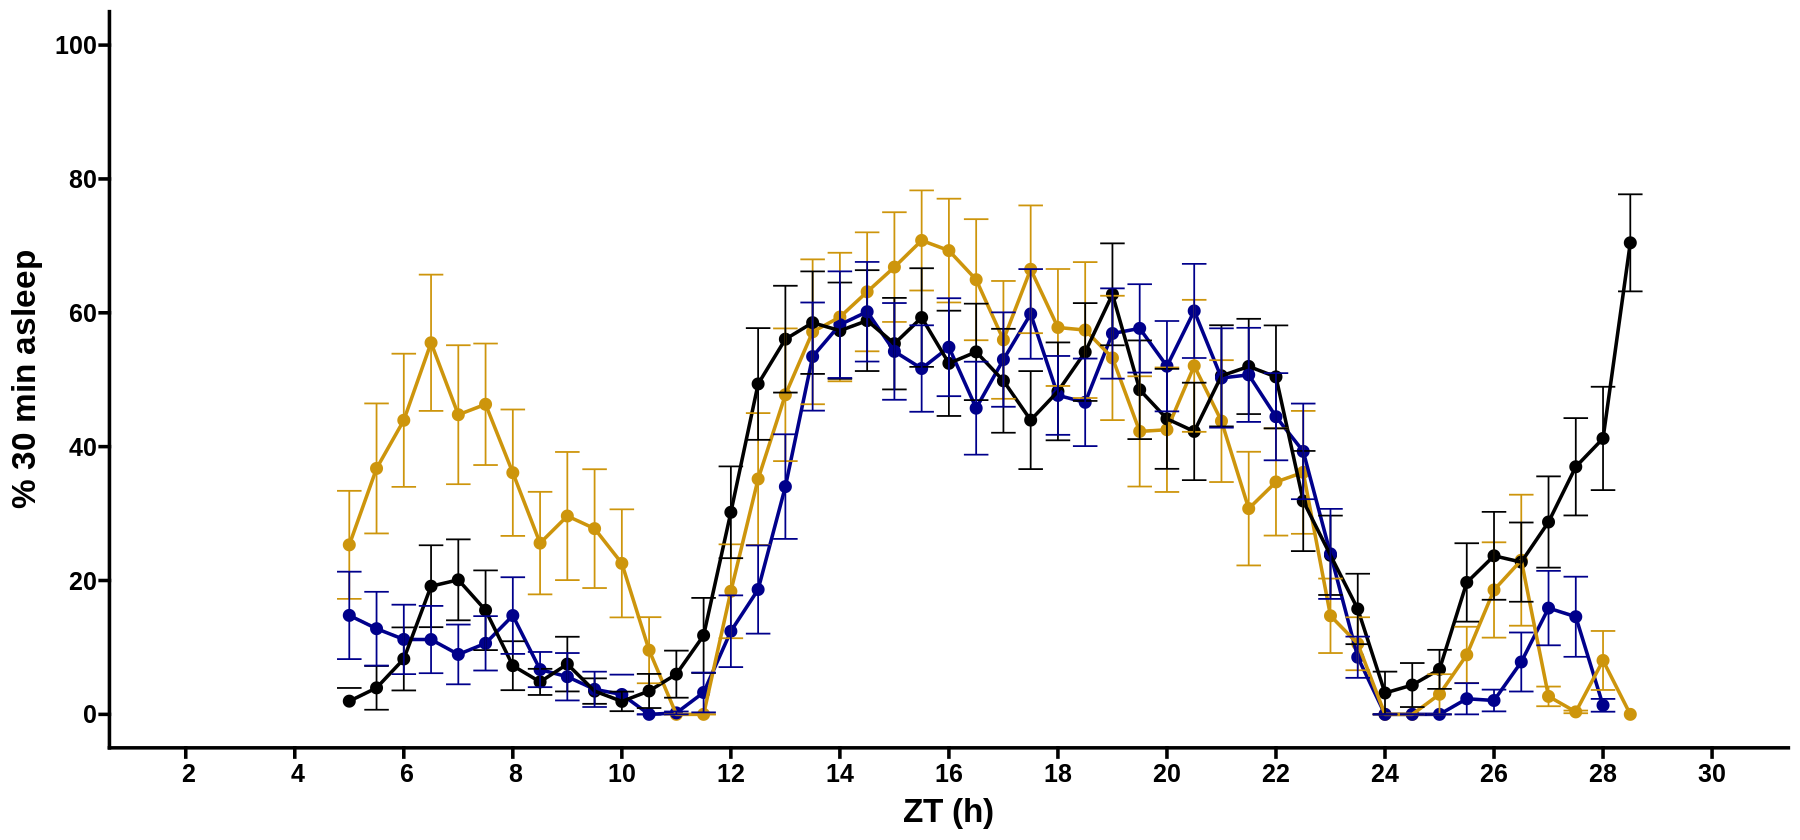

In [91]:
options(repr.plot.width=15, repr.plot.height=7)

# out <- preprocess_sleep_data(panel4_data[Training_session != "NONE",], "Training_session")
out <- preprocess_sleep_data(panel4_data, "Training_session")
dt<-out$dt
dt_summ <- out$dt_summ
panel4C <- sleep_plot(
    dt = dt_summ[t>=behavr::hours(5), ],
    # colors=colors_panel4[1:2],
    colors=colors_panel4,    
    point_size=3,
    line_size=1,
    # dt = dt_summ[t>=behavr::hours(5), .(t, n, variable, group__, mu=mu*30, sigma=sigma*30, sem=sem*30)],
) + guides(color="none") +
   theme(
       axis.text=element_text(size=15),
       axis.title=element_text(size=20)
   ) +
   scale_x_hours(name="ZT", limits=behavr::hours(c(2, 30)), breaks=behavr::hours(seq(2, 30, 2)))
# panel4C <- panel4C + scale_x_hours(name="ZT", limits=behavr::hours(c(5, 30)))

svg(filename ="figures/panel4C.svg", width=9, height=3.5)
panel4C
dev.off()
panel4C

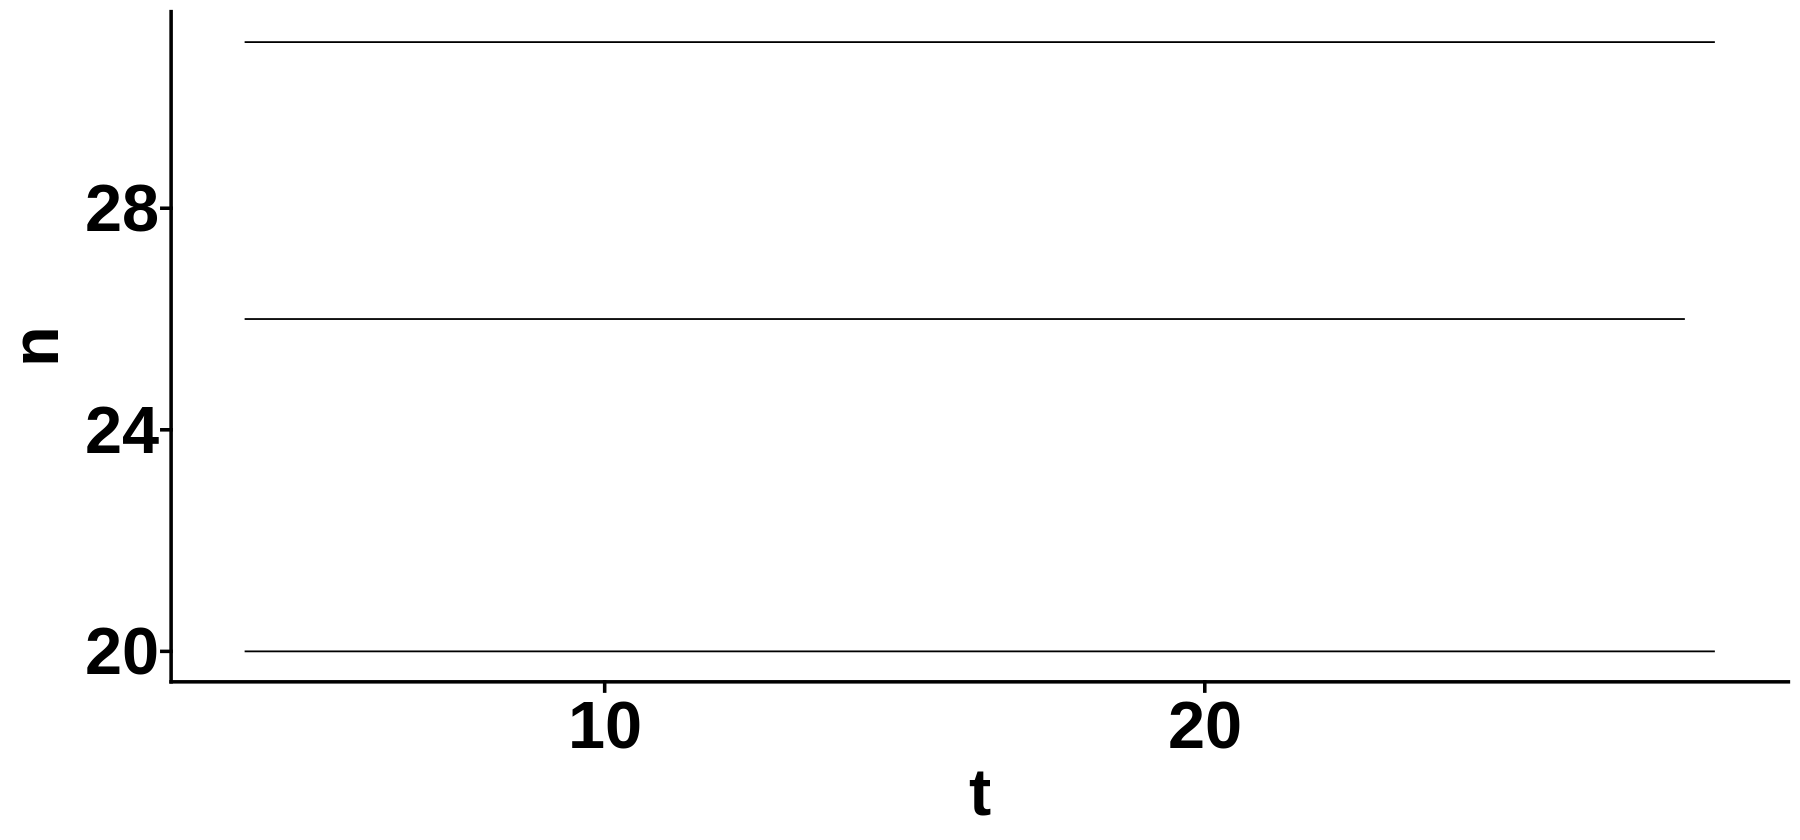

In [84]:
ggplot(data=dt_summ[!is.na(mu),.(mu, group__, t = t/3600, n)], aes(x=t, y=n, group=group__)) + geom_line()

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_line()`).”


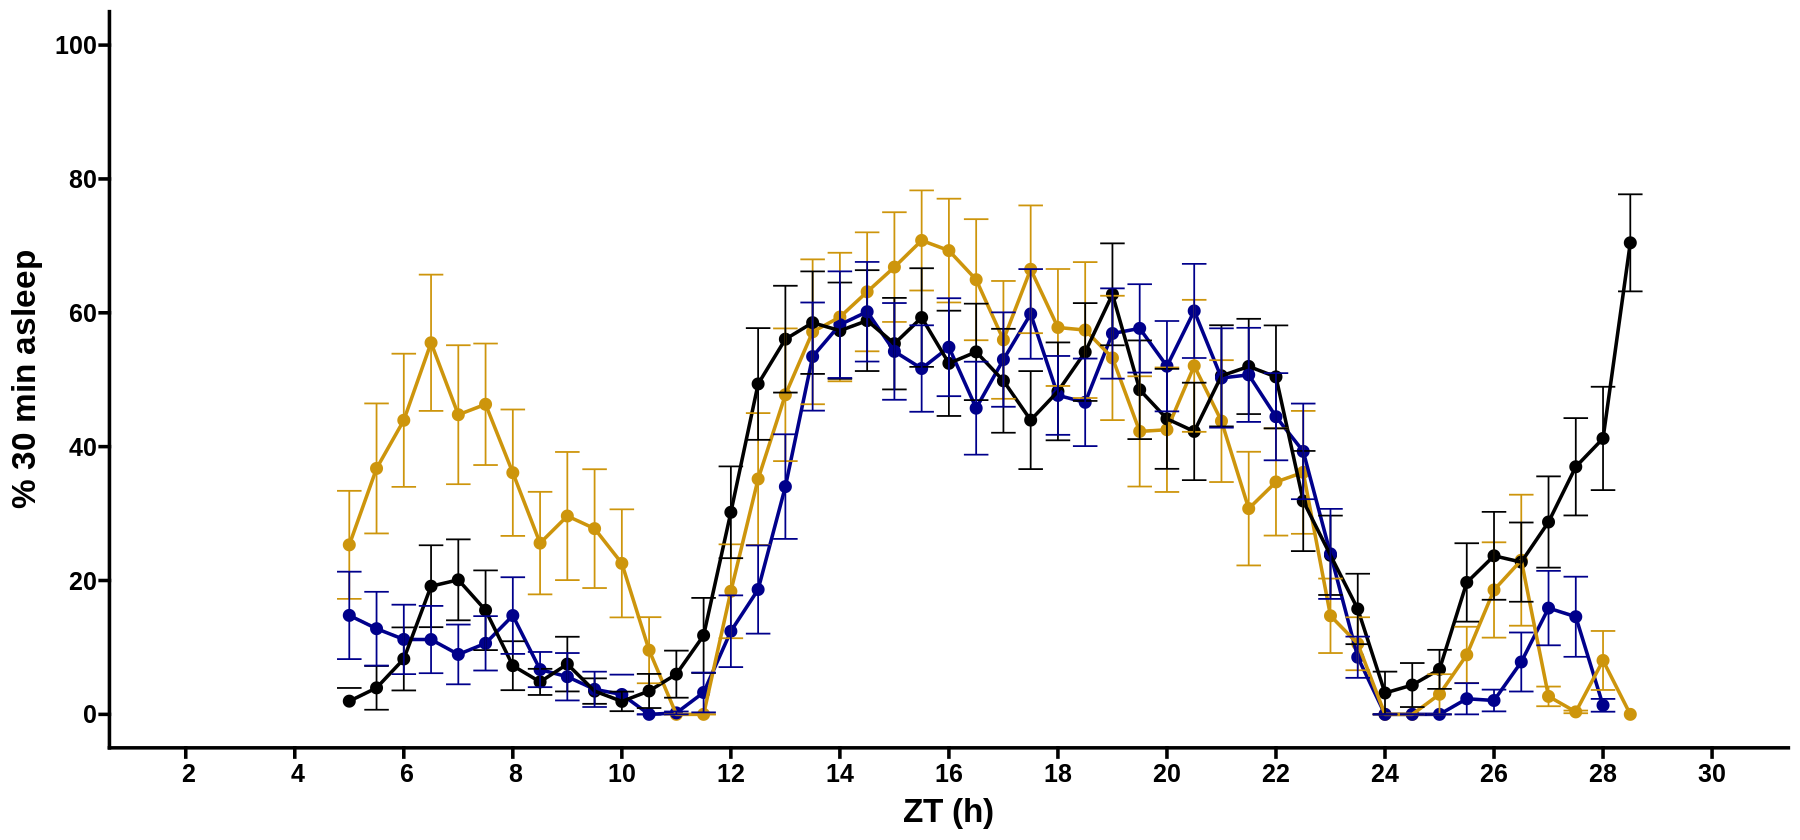

In [74]:
panel4C

In [44]:
intervals <- list(c(5, 11), c(12, 18), c(5,24))
dts <- list()
dt_animals <- list()
for (interval in intervals) {
    dt_animal <- dt[variable=="asleep" & t >= behavr::hours(interval[1]) & t < behavr::hours(interval[2]), .(asleep=sum(value, na.rm=TRUE)*30), by=.(group__, fly_name_reference)]
    out <- dt_animal[, .(asleep=mean(asleep), sd = sd(asleep), sem = sd(asleep)/sqrt(.N)), by=group__]
    interval_value <- paste(paste0("ZT", stringr::str_pad(interval, width = 2, pad = "0")), collapse="-")
    out$interval <- interval_value
    dt_animal$interval <- interval_value
    
    dts <- c(dts, list(out))
    dt_animals <- c(dt_animals, list(dt_animal))
    
}

In [45]:
summ_data <- do.call(rbind, dts)
summ_data_animals <- do.call(rbind, dt_animals)

In [94]:
# summ_data_animals[interval=="ZT05-ZT11" & group__ == "6X Spaced",]
summ_data_animals[,batch := substr(fly_name_reference, 1, 20)]

In [170]:
options(repr.plot.width=4, repr.plot.height=7)
panel4D <- ggplot() +
    geom_bar(data=summ_data[interval=="ZT05-ZT11",], aes(x=group__, y=asleep, fill=group__), stat="identity") +
    geom_point(data=summ_data_animals[interval=="ZT05-ZT11",], size=2, aes(x=group__, y=asleep)) +
    # geom_point(data=summ_data_animals[interval=="ZT05-ZT11",], aes(col=batch, x=group__, y=asleep)) +
    scale_fill_manual(values=colors_panel4) +
    scale_x_discrete(
            # expand = expansion(mult = c(0.1, 0.1)),
            labels = function(x) stringr::str_wrap(x, width = 5),
            name=""
        ) +
    guides(fill="none", color="none")+
    scale_y_continuous(name="ZT05-ZT11 sleep (min)", limits=c(0,270), breaks=seq(0, 240, 60)) +
    geom_errorbar(data=summ_data[interval=="ZT05-ZT11",], aes(x=group__, y=asleep, ymin=asleep-sem, ymax=asleep+sem), width=.25) +
    geom_signif(
        data=summ_data_animals[interval=="ZT05-ZT11",],
        mapping=aes(x=group__, y=asleep),
        comparisons=list(c("6X Massed", "6X Spaced")),
        test=unpaired_t_test,
        map_signif_level=TRUE,
        y_position=240,
        size=2,
        textsize=14
    ) + theme(
        axis.text.y = element_text(size=30),
        axis.title.y = element_text(size=35),
        axis.ticks.x = element_blank(),
        axis.text.x = element_blank()
    )
svg(filename= "figures/panel4D.svg", width=4, height=7)
panel4D
dev.off()

Warning message in geom_signif(data = summ_data_animals[interval == "ZT05-ZT11", :
“You have set data and mapping, are you sure that manual = FALSE is correct?”


png 
  2

Warning message:
“Removed 1909 rows containing non-finite values (`pop_etho()`).”


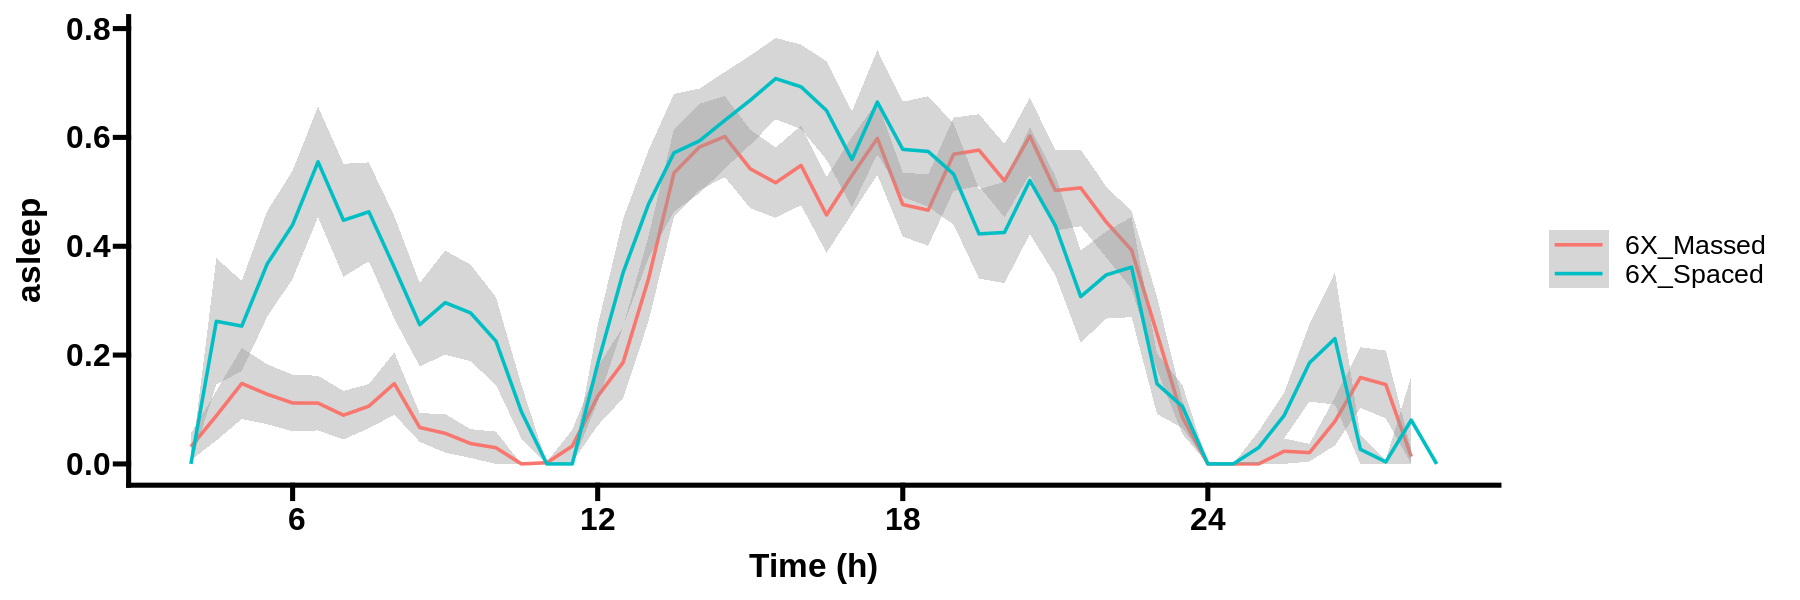

In [331]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data=dt_sleep, aes(x=t,y=asleep, color=Training_session)) + geom_pop_etho() + scale_x_hours()